In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from numba import njit
from tqdm.notebook import tqdm
import matplotlib.animation as animation

# Punto 1

  0%|          | 0/1000 [00:00<?, ?it/s]

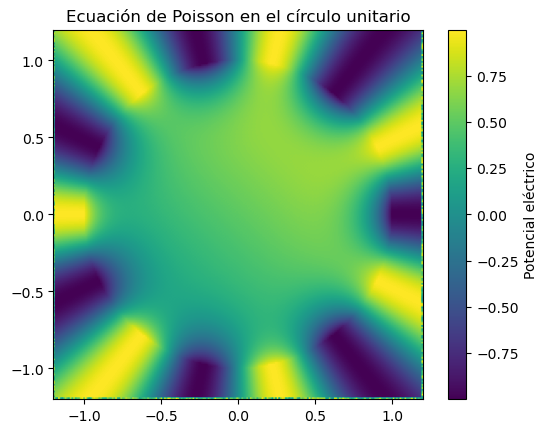

In [2]:
N = 220
x = np.linspace(-1.2, 1.2, N)
y = np.linspace(-1.2, 1.2, N)
dx = 2.2 / N
X, Y = np.meshgrid(x, y)

U = np.random.rand(N, N)
dens = -X - Y

it = 1000

for i in tqdm(range(it)):
    U_act = U.copy()
    for a in range(1, N-1):
        for b in range(1, N-1):
            r = np.sqrt(x[a]**2 + y[b]**2)

            if r < 1:
                U_act[a, b] = (U[a+1, b] + U[a-1, b] + U[a, b+1] + U[a, b-1] - (4 * np.pi * dx**2) * dens[a, b]) / 4

            else:
                U_act[a, b] = np.sin(7 * np.arctan2(y[b], x[a]))

    U = U_act

plt.imshow(U, extent=[-1.2, 1.2, -1.2, 1.2], origin='lower')
plt.colorbar(label="Potencial eléctrico")
plt.title("Ecuación de Poisson en el círculo unitario")
plt.show()

# Punto 2

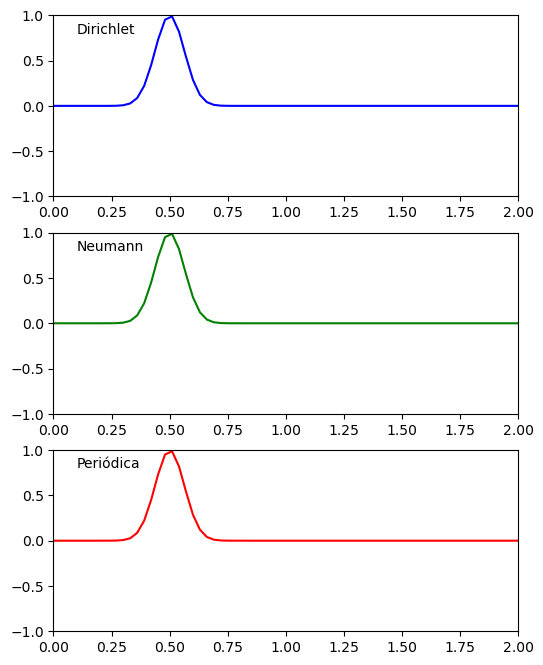

In [31]:
L = 2     
c = 1      
dt = 0.01  
dx = 0.03  
Nt = 1000 
C = c*dt/dx
x = np.arange(0,L+dx,dx)
t = np.linspace(0,1,Nt)
Nx = len(x)

def evolucionar(U, cond):
    U[0] = np.exp(-125*(x-0.5)**2)
    U[0] = cond(U[0])
    for i in range(1, Nx-1):
        U[1,i] = U[0,i] + 0.5*C**2*(U[0,i+1] - 2*U[0,i] + U[0,i-1])
    for k in range(1,Nt-1):
        for j in range(1, Nx - 1):
            U[k+1,j] = (U[k,j+1] - 2*U[k,j] + U[k,j-1])*(dt**2/dx**2) + 2*U[k,j] - U[k-1,j]
            U[k + 1] = cond(U[k + 1])

    return U

def D(U):
    U[0] = 0
    U[-1] = 0
    return U

def N(U):
    U[0] =  U[1]
    U[-1] = U[-2]
    return U

def P(U):
    U[0] = U[-2]
    U[-1] = U[1]
    return U

U = np.zeros((Nt, Nx))
Dirichlet= evolucionar(U,D)
Neumann= evolucionar(U,N)
Periodica= evolucionar(U,P)

fig, axs = plt.subplots(3, 1, figsize=(6, 8))
for ax in axs:
    ax.set_xlim(0, L)
    ax.set_ylim(-1,1)
    
linea_d, = axs[0].plot(x,Dirichlet[0], 'b')
linea_n, = axs[1].plot(x,Neumann[0], 'g')
linea_p, = axs[2].plot(x,Periodica[0], 'r')

axs[0].text(0.05, 0.9, 'Dirichlet', transform=axs[0].transAxes)
axs[1].text(0.05, 0.9, 'Neumann', transform=axs[1].transAxes)
axs[2].text(0.05, 0.9, 'Periódica', transform=axs[2].transAxes)

def draw_frame(frame):
    linea_d.set_ydata(Dirichlet[frame])
    linea_n.set_ydata(Neumann[frame])
    linea_p.set_ydata(Periodica[frame])
    return linea_d, linea_n, linea_p

anim = animation.FuncAnimation(fig, draw_frame, frames=range(Nt), interval=50, blit=False)
anim

En el primer caso con las condiciones de Dirichlet la onda se refleja de forma invertida, en el segundo caso con las condiciones de Neumann la onda se refleja sin cambiar su orientación, y en el caso periódico hay una señal periódica que viaja en el mismo sentido siempre.

El coeficiente de Courant utilizado en este caso tiene un valor de 0.33 lo que implica que la solución no diverge y es estable. Si C fuera igual a 1, la evolución de la onda dependeería únicamente de la información sobre el paso anterior.

# Punto 3

# 3.1

In [3]:
Nx = 400
dt = 1e-5
ts = int(2/dt)
a = 0.022

xs = np.linspace(0,2, Nx+1)[:-1]
dx = xs[1]-xs[0]

U = np.zeros((Nx,ts))
U[:,0] = np.cos(xs*np.pi)

@njit("f8[:,:](f8[:,:],i8)")

def evol(U,it):
    for j in range(it):
        for i in range(0, Nx - 2):
            U[i,j+1] = U[i,j] - (1/3)*(dt/dx)*(U[np.mod(i+1,Nx),j]+U[i,j]+U[np.mod(i-1,Nx),j])*(U[np.mod(i+1,Nx),j]-U[np.mod(i-1,Nx),j])-(a**2*dt/dx**3)*(U[np.mod(i+2,Nx),j]-2*U[np.mod(i-1,Nx),j]+2*U[np.mod(i-1,Nx),j]-U[np.mod(i-2,Nx),j])

    return U

In [4]:
U =evol(U,1000)

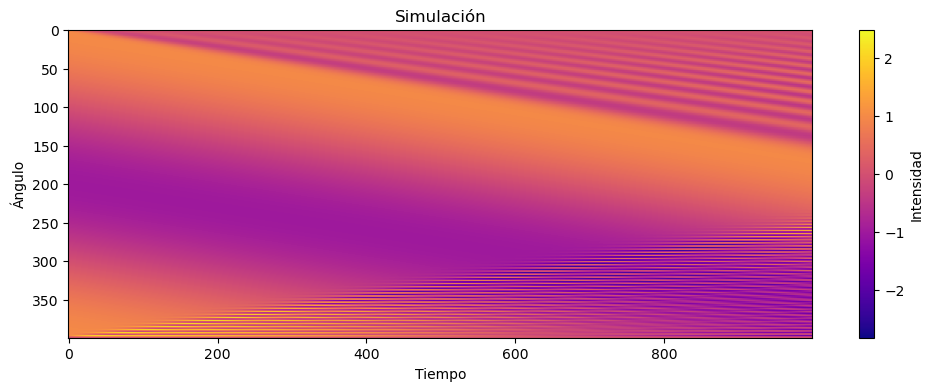

In [5]:
plt.figure(figsize=(12, 4))
plt.imshow(U[:,:1000], aspect='auto', cmap='plasma')
plt.colorbar(label='Intensidad')
plt.title('Simulación')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.show()

# 3.3

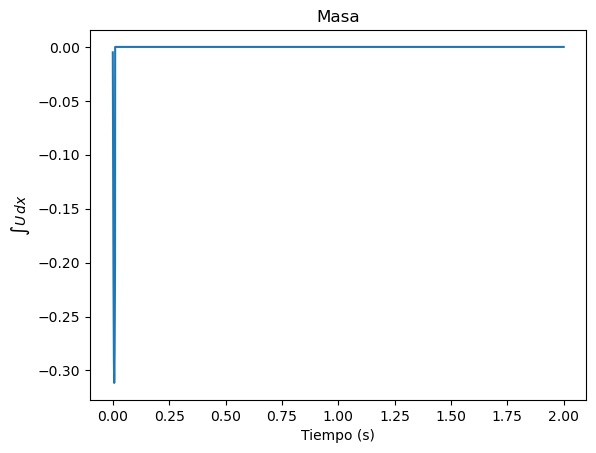

In [79]:
integral_U = np.zeros(ts)
for j in range(ts):
    integral_U[j] = np.trapz(U[:, j], x=xs)

plt.figure()
plt.plot(np.arange(ts) * dt, integral_U)
plt.title("Masa")
plt.xlabel("Tiempo (s)")
plt.ylabel(r"$\int U \, dx$")
plt.grid(False)
plt.show()

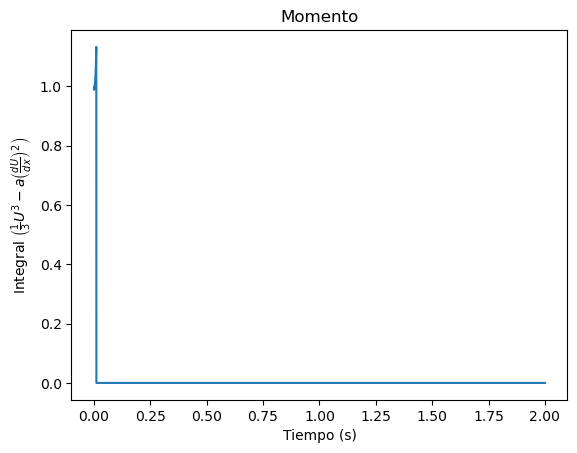

In [8]:
integral_Um = np.zeros(ts)
for j in range(ts):
    integral_Um[j] = np.trapz((U[:, j])**2, x=xs)


plt.figure()
plt.plot(np.arange(ts) * dt, integral_Um)
plt.title(r"Momento")
plt.xlabel("Tiempo (s)")
plt.ylabel(r"Integral $\left(\frac{1}{3} U^3 - a \left(\frac{dU}{dx}\right)^2\right)$")
plt.grid(False)
plt.show()

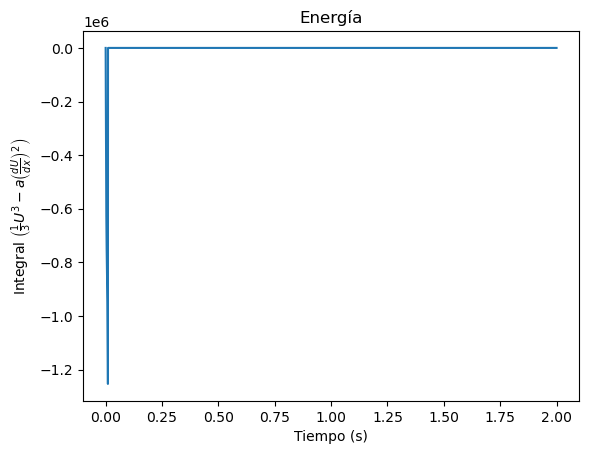

In [9]:
integral_expr = np.zeros(ts)

for j in range(ts):
    A = (1/3)*U[:, j]**3
    dU_dx = np.zeros(Nx)
    for i in range(1, Nx - 1):
        dU_dx[i] = (U[i-1, j] - 2*U[i, j] + U[i+1, j])/dx**2
    B = a**2*dU_dx**2
    integral_expr[j] = np.trapz(A - B, x=xs)

plt.figure()
plt.plot(np.arange(ts) * dt, integral_expr)
plt.title(r"Energía")
plt.xlabel("Tiempo (s)")
plt.ylabel(r"Integral $\left(\frac{1}{3} U^3 - a \left(\frac{dU}{dx}\right)^2\right)$")
plt.grid(False)
plt.show()

Tanto la masa como el momento y la energía se conservan en el tiempo

# 3.2

Cuando alpha aumenta la solución diverge, mientras que cuando alpha disminuye, las líneas en la imagen desaparecen. Esto se debe a que, para alphas péqueños la dispersión es menor y se generan menos ondas, y por ende, menos patrones de líneas. A  partir de 0.3, para alphas menores aparecen patrones de líneas muy tenues que desaparecen para alphas menores a 0.001

In [64]:
Nx = 400
dt = 1e-5
ts = int(2/dt)
a = 0.0009

xs = np.linspace(0,2, Nx+1)[:-1]
dx = xs[1]-xs[0]

U = np.zeros((Nx,ts))
U[:,0] = np.cos(xs*np.pi)

#@njit("f8[:,:](f8[:,:],i8)")

def evol(U,it):
    for j in range(it):
        for i in range(0, Nx - 2):
            U[i,j+1] = U[i,j] - (1/3)*(dt/dx)*(U[np.mod(i+1,Nx),j]+U[i,j]+U[np.mod(i-1,Nx),j])*(U[np.mod(i+1,Nx),j]-U[np.mod(i-1,Nx),j])-(a**2*dt/dx**3)*(U[np.mod(i+2,Nx),j]-2*U[np.mod(i-1,Nx),j]+2*U[np.mod(i-1,Nx),j]-U[np.mod(i-2,Nx),j])

    return U

evol(U,1000)


array([[1.        , 1.        , 0.99860214, ..., 0.        , 0.        ,
        0.        ],
       [0.99987663, 0.99987768, 0.99981394, ..., 0.        , 0.        ,
        0.        ],
       [0.99950656, 0.99950866, 0.99951076, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99888987, 0.99888673, 1.00027997, ..., 0.        , 0.        ,
        0.        ],
       [0.99950656, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99987663, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

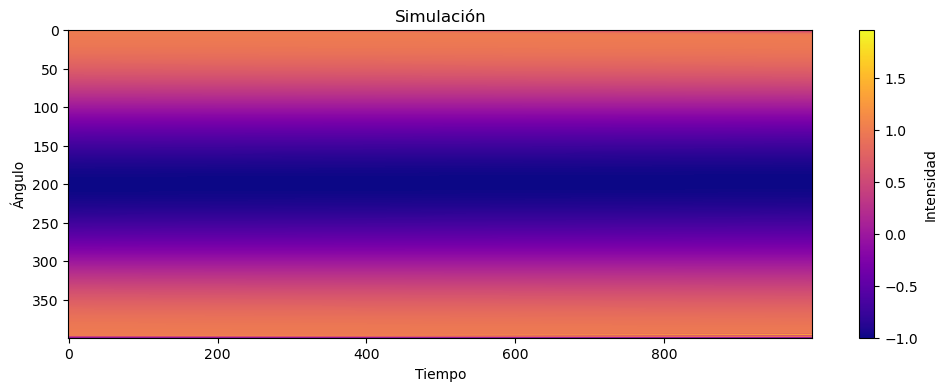

In [65]:
plt.figure(figsize=(12, 4))
plt.imshow(U[:,:1000], aspect='auto', cmap='plasma')
plt.colorbar(label='Intensidad')
plt.title('Simulación')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.show()

# Punto 4

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

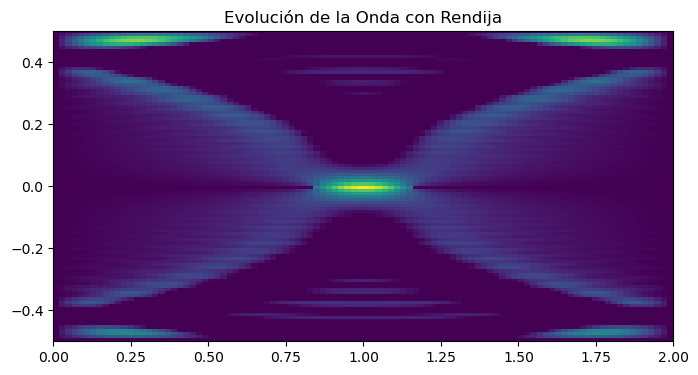

In [29]:
c = 0.5 
N = 100 
x = np.linspace(0, 2, N)
y = np.linspace(-1/2, 1/2, N)
dx = x[1] - x[0]    
dy = y[1] - y[0]   
dt = 0.01      
wx = 0.02     
wy = 0.16     


U = np.zeros((N, N))      
U_prev = np.zeros((N, N))  
U_next = np.zeros((N, N))   

for j in range(1, N-1):
    for k in range(1, N-1):
        U[j, k] = np.exp(-150 * ((x[j] - 1)**2 + (y[k])**2))

j_rendija = np.argmin(np.abs(x - 1)) 
y_center = (y >= -wy/2) & (y <= wy/2)  
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(U, extent=[0, 2, -0.5, 0.5], cmap='viridis', origin='lower')
ax.set_title("Evolución de la Onda con Rendija")

def update(frame):
    global U, U_prev, U_next
    for j in range(1, N-1):
        for k in range(1, N-1):
            U_x = (U[j+1, k] - 2*U[j, k] + U[j-1, k]) / dx**2
            U_y = (U[j, k+1] - 2*U[j, k] + U[j, k-1]) / dy**2
            U_next[j, k] = (c**2) * (U_x + U_y) * dt**2 + 2*U[j, k] - U_prev[j, k]
    U_next[0, :] = 0    
    U_next[-1, :] = 0   
    U_next[:, 0] = 0  
    U_next[:, -1] = 0    
    U_next[j_rendija, :] = 0       
    U_next[j_rendija, y_center] = U[j_rendija, y_center]  
    U_prev = U.copy()
    U = U_next.copy()
    heatmap.set_array(U)
    return heatmap,

anim = animation.FuncAnimation(fig, update, frames=range(200), interval=50, blit=True)
anim.save("ecdeonda2D_D.mp4", writer='ffmpeg', fps=30)
anim

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

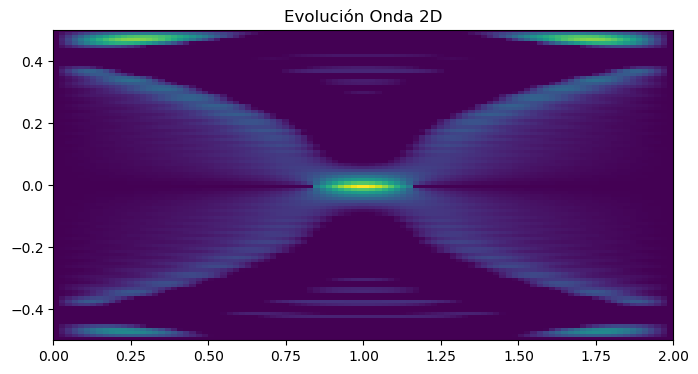

In [30]:
U = np.zeros((N, N)) 
U_prev = np.zeros((N, N)) 
U_next = np.zeros((N, N))   

for j in range(1, N-1):
    for k in range(1, N-1):
        U[j, k] = np.exp(-150 * ((x[j] - 1)**2 + (y[k])**2))
y_center = (y >= -wy/2) & (y <= wy/2) 

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(U, extent=[0, 2, -0.5, 0.5], cmap='viridis', origin='lower')
ax.set_title("Evolución Onda 2D")

def update(frame):
    global U, U_prev, U_next

    U_x = np.zeros_like(U) 
    U_y = np.zeros_like(U)  
    for j in range(1, N-1):
        for k in range(1, N-1):
            U_x[j, k] = (U[j+1, k] - 2*U[j, k] + U[j-1, k]) / dx**2
            U_y[j, k] = (U[j, k+1] - 2*U[j, k] + U[j, k-1]) / dy**2

    U_x[0, :] = 0 
    U_x[-1, :] = 0  
    U_y[:, 0] = 0 
    U_y[:, -1] = 0  

    j_rendija = np.argmin(np.abs(x - 1))
    U_x[j_rendija, :] = 0  
    U_x[j_rendija, y_center] = U[j_rendija, y_center] 

    for j in range(1, N-1):
        for k in range(1, N-1):
            U_next[j, k] = (c**2)*(U_x[j,k] + U_y[j, k])*dt**2 + 2*U[j,k] - U_prev[j,k]
    U_next[j_rendija, :] = 0  
    U_next[j_rendija, y_center] = U[j_rendija, y_center] 

    U_prev = U.copy()
    U = U_next.copy()
    heatmap.set_array(U)
    return heatmap,

anim = animation.FuncAnimation(fig, update, frames=range(200), interval=50, blit=True)
anim.save("ecdeonda2D_N.mp4", writer='ffmpeg', fps=30)
anim